<a href="https://colab.research.google.com/github/SamInMotion/Forage-Job-Simulation_Deloitte-task-1/blob/main/Final_Result__BCG_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Financial Analysis of Microsoft, Tesla, and Apple (2022–2024)

In this notebook, we'll analyze and visualize key financial metrics for Microsoft, Tesla, and Apple over the period of 2022 to 2024. We focus on metrics including Revenue, Net Income, Operating Cash Flow, and Debt Management to identify trends and provide insights into their financial health and performance. The color scheme chosen reflects each company's brand identity while ensuring clear differentiation in our visualizations.


In [ ]:
import pandas as pd

## Data Overview

We first load our manually extracted financial data from 10-K filings. This dataset contains key financial metrics for Microsoft, Apple, and Tesla over three fiscal years (2022-2024).

The exploration below provides a snapshot of our dataset structure and summary statistics to establish a foundation for our deeper analysis.

In [ ]:
df = pd.read_csv('/content/Cleaned_Financial_Data.csv')

In [ ]:
print(df.columns)


Index(['Company', 'Year', 'Total Revenue', 'Net Income', 'Total Assets',
       'Total Liabilities', 'Operating Cash Flow'],
      dtype='object')


### Data Overview
We've loaded financial data for three companies covering three fiscal years (2022–2024). Our dataset includes:

- Total Revenue
- Net Income
- Total Assets
- Total Liabilities
- Operating Cash Flow

We'll use this data to explore year-over-year trends, calculate growth percentages, and visualize key financial metrics.


### Calculated Growth Metrics
We've calculated year-over-year growth rates (%) for both revenue and net income. These metrics provide insights into how effectively each company is expanding and increasing profitability each year.


In [ ]:
df['Revenue Growth (%)'] = df.groupby(['Company'])['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby(['Company'])['Net Income'].pct_change() * 100


### Average Financial Metrics (2022–2024)

The table below summarizes the average key financial metrics for each company over the 3-year period. These averages provide a clear snapshot of overall financial performance:

- **Total Revenue:** Reflects the average annual sales performance.
- **Net Income:** Indicates the average profitability.
- **Total Assets:** Highlights the typical scale of company resources.
- **Total Liabilities:** Provides an average measure of debt or obligations.
- **Operating Cash Flow:** Represents average annual cash generated by core business activities.

These averages can help investors quickly identify which company has generally outperformed in profitability, revenue scale, and cash generation.


In [ ]:
mean_metrics = df.groupby('Company')[[
    'Total Revenue', 'Net Income', 'Total Assets',
    'Total Liabilities', 'Operating Cash Flow'
]].mean()

print(mean_metrics)


           Total Revenue    Net Income   Total Assets  Total Liabilities  \
Company                                                                    
Apple      389549.333333  96844.666667  356772.666667      300183.333333   
Microsoft  218445.000000  77619.333333  429659.666667      215912.333333   
Tesla       91975.000000  11571.333333  103675.333333       42613.000000   

           Operating Cash Flow  
Company                         
Apple            116982.666667  
Microsoft         98388.333333  
Tesla             14301.000000  


### Combined Annual Financial Metrics (2022–2024)

This summary table presents the combined annual totals of revenue, net income, and operating cash flow for Apple, Microsoft, and Tesla. It provides insights into the overall financial trends and market dynamics among these major tech companies:

- **Total Revenue:** Demonstrates market size and growth potential year-over-year.
- **Net Income:** Highlights the overall profitability trend across these industry leaders.
- **Operating Cash Flow:** Reflects the overall capacity of these companies to generate cash from operational activities.

Analyzing these combined figures helps investors identify broader economic trends affecting the tech sector.

In [ ]:
annual_avg = df.groupby('Year')[['Total Revenue', 'Net Income', 'Operating Cash Flow']].sum()
print(annual_avg)


      Total Revenue  Net Income  Operating Cash Flow
Year                                                
2022         674088      184751               225910
2023         691973      184330               211381
2024         733847      189025               251725


## Key Financial Metrics Calculation

To enable meaningful comparison and trend analysis, we calculate several critical financial metrics:

1. **Growth Metrics**: Year-over-year percentage changes in revenue, net income, and total assets.
2. **Profitability Metrics**: Net profit margin, showing each company's ability to convert revenue into profit.
3. **Financial Health Metrics**: Debt-to-asset ratio, indicating leverage and financial risk.
4. **Operational Efficiency**: Cash flow efficiency, measuring how effectively companies convert accounting profits to cash.

These metrics will form the foundation of our comparative analysis across companies and time periods.

In [ ]:
df['Revenue Growth (%)'] = df.groupby(['Company'])['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby(['Company'])['Net Income'].pct_change() * 100
df['Total Assets Growth (%)'] = df.groupby(['Company'])['Total Assets'].pct_change() * 100

# Calculat ingfinancial ratios
df['Net Profit Margin (%)'] = (df['Net Income'] / df['Total Revenue']) * 100
df['Debt to Asset Ratio (%)'] = (df['Total Liabilities'] / df['Total Assets']) * 100

# Calculating Cash Flow Efficiency safely
df['Cash Flow Efficiency'] = df.apply(
    lambda x: x['Operating Cash Flow'] / x['Net Income'] if x['Net Income'] > 0 else np.nan,
    axis=1
)

# Handling potential infinity values
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Show the calculated metrics
print("Growth metrics and financial ratios:")
metrics_columns = [
    'Company', 'Year', 'Revenue Growth (%)', 'Net Income Growth (%)',
    'Net Profit Margin (%)', 'Debt to Asset Ratio (%)', 'Cash Flow Efficiency'
]
print(df[metrics_columns].dropna().head().to_string())

# Print average metrics manually for better formatting
print("\nAverage metrics by company:")
avg_metrics = df.groupby('Company')[
    ['Revenue Growth (%)', 'Net Income Growth (%)', 'Net Profit Margin (%)',
     'Debt to Asset Ratio (%)', 'Cash Flow Efficiency']
].mean().round(2)

for company in avg_metrics.index:
    print(f"\n{company}:")
    for column in avg_metrics.columns:
        print(f"  {column}: {avg_metrics.loc[company, column]:.2f}")

Growth metrics and financial ratios:
     Company  Year  Revenue Growth (%)  Net Income Growth (%)  Net Profit Margin (%)  Debt to Asset Ratio (%)  Cash Flow Efficiency
1  Microsoft  2023          -13.547132             -17.898475              34.146238                49.942958              1.210348
2  Microsoft  2022           -6.425690               0.000000              36.491039                54.352045              1.230428
4      Tesla  2023           -0.938684             109.338739              15.473324                40.339342              0.885268
5      Tesla  2022          -15.821562             -15.940964              15.451376                44.256601              1.169778
7      Apple  2023           -1.981920               3.476786              25.306234                82.374079              1.139677

Average metrics by company:

Apple:
  Revenue Growth (%): 0.45
  Net Income Growth (%): 3.19
  Net Profit Margin (%): 24.86
  Debt to Asset Ratio (%): 84.14
  Cash Flow E

## Growth Rate Comparison

These visualizations compare the year-over-year growth rates in revenue and net income. Growth metrics are critical indicators of company momentum and market expansion.

Key insights:
- Growth patterns vary significantly between companies, reflecting different market positions and strategies
- Year 2023 shows divergent performance across the companies
- Tesla shows the highest volatility in growth metrics

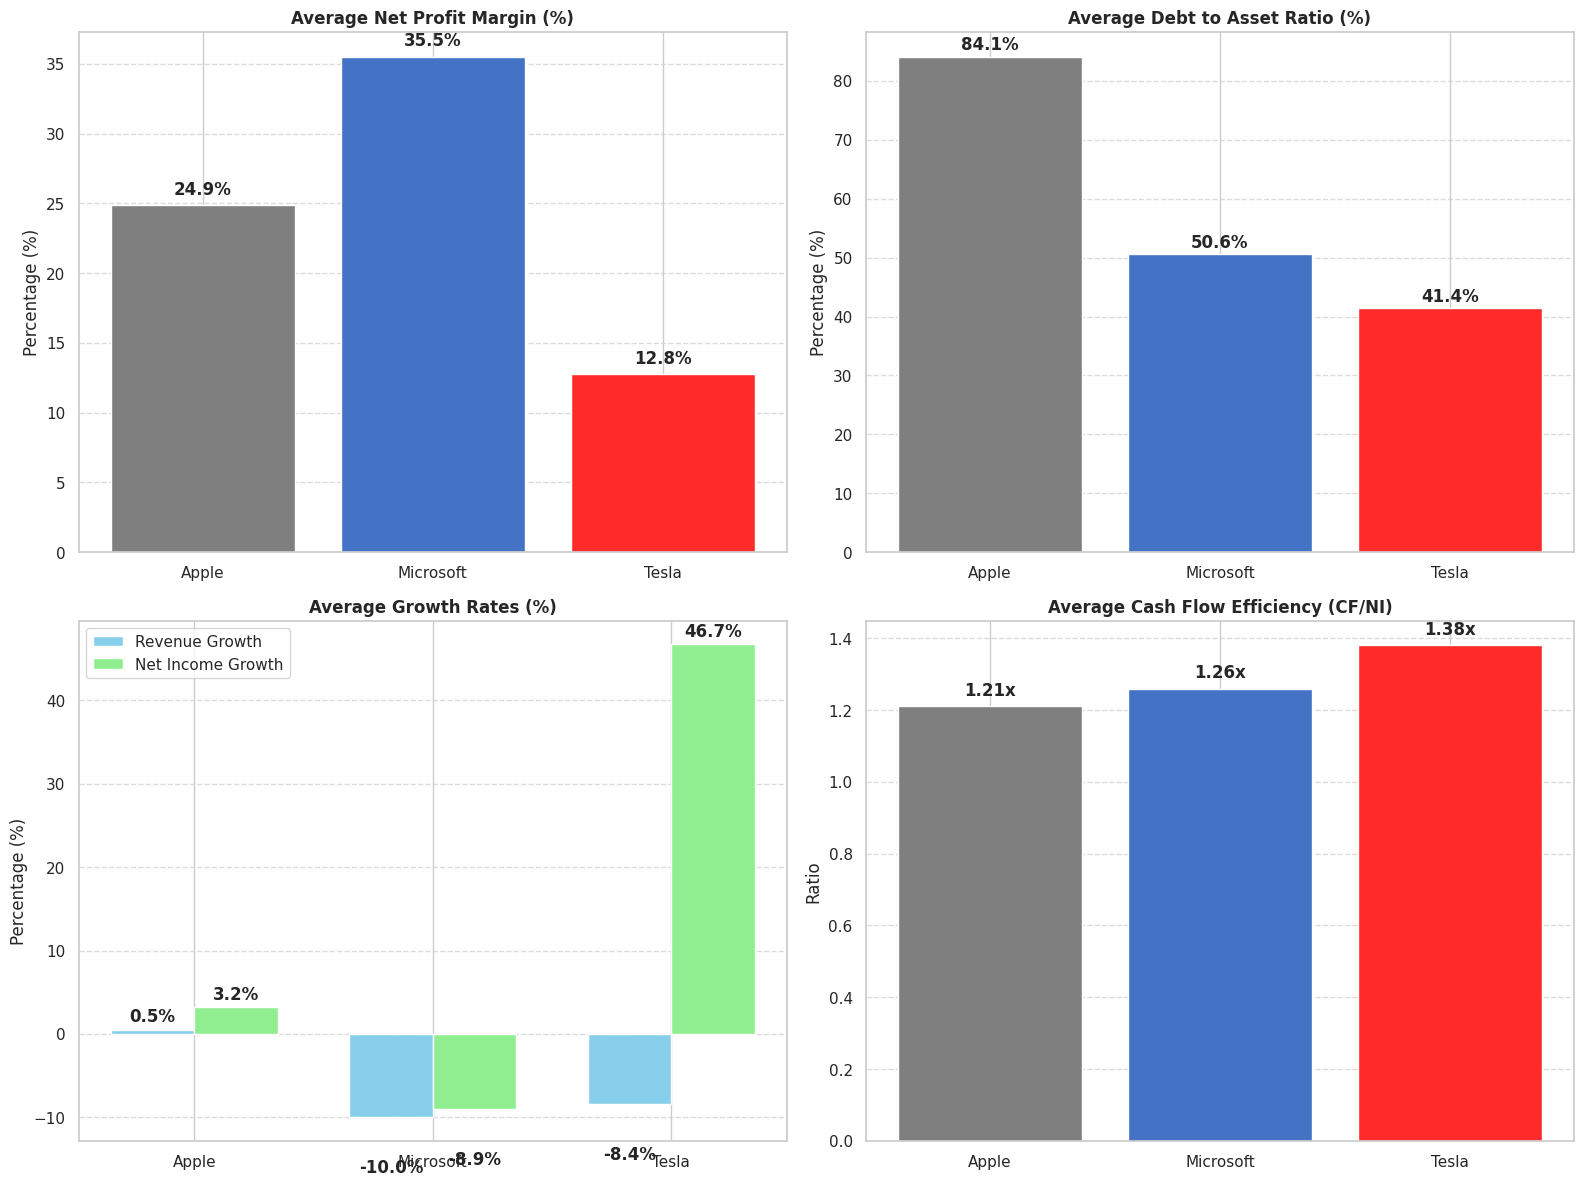

In [ ]:
# Creating visualizations of the average metrics
plt.figure(figsize=(16, 12))

# Profit Margin subplot
plt.subplot(2, 2, 1)
bars1 = plt.bar(range(len(avg_metrics.index)), avg_metrics['Net Profit Margin (%)'],
        color=[company_colors.get(company) for company in avg_metrics.index])
plt.title('Average Net Profit Margin (%)', fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(len(avg_metrics.index)), avg_metrics.index, rotation=0)
plt.ylabel('Percentage (%)')

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# Debt Ratio subplot
plt.subplot(2, 2, 2)
bars2 = plt.bar(range(len(avg_metrics.index)), avg_metrics['Debt to Asset Ratio (%)'],
        color=[company_colors.get(company) for company in avg_metrics.index])
plt.title('Average Debt to Asset Ratio (%)', fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(len(avg_metrics.index)), avg_metrics.index, rotation=0)
plt.ylabel('Percentage (%)')

# Add value labels on bars
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# Growth Rates subplot - Create a separate chart for each growth metric
plt.subplot(2, 2, 3)
x = np.arange(len(avg_metrics.index))
width = 0.35

# Revenue Growth bars
revenue_bars = plt.bar(x - width/2, avg_metrics['Revenue Growth (%)'],
                    width, label='Revenue Growth', color='skyblue')
# Net Income Growth bars
income_bars = plt.bar(x + width/2, avg_metrics['Net Income Growth (%)'],
                   width, label='Net Income Growth', color='lightgreen')

plt.title('Average Growth Rates (%)', fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(x, avg_metrics.index, rotation=0)
plt.ylabel('Percentage (%)')
plt.legend()

# Add value labels on bars
for bar in revenue_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5 if height > 0 else height - 5,
            f'{height:.1f}%', ha='center', va='bottom' if height > 0 else 'top',
            fontweight='bold')

for bar in income_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5 if height > 0 else height - 5,
            f'{height:.1f}%', ha='center', va='bottom' if height > 0 else 'top',
            fontweight='bold')

# Cash Flow Efficiency subplot
plt.subplot(2, 2, 4)
bars4 = plt.bar(range(len(avg_metrics.index)), avg_metrics['Cash Flow Efficiency'],
        color=[company_colors.get(company) for company in avg_metrics.index])
plt.title('Average Cash Flow Efficiency (CF/NI)', fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(len(avg_metrics.index)), avg_metrics.index, rotation=0)
plt.ylabel('Ratio')

# Add value labels on bars
for bar in bars4:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{height:.2f}x', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### Revenue Trends (2022–2024)
- Microsoft has shown consistent growth, indicating strong sales expansion driven by its diversified product portfolio.
- Tesla experienced high growth initially (18.8% growth from 2022 to 2023) but stalled significantly afterward (0.95% growth from 2023 to 2024), suggesting market or competition pressure.
- Apple showed stable revenue with a slight decline, reflecting maturity in its product segments.


### Growth Metrics and Key Financial Ratios

The following calculations provide essential insights into each company's financial performance and stability over the analyzed period:

- **Revenue Growth (%) and Net Income Growth (%):** Reflect the year-over-year change in revenues and profitability, indicating how effectively each company expands its market presence and manages costs.
- **Net Profit Margin (%):** Shows the proportion of revenue that remains as profit, highlighting operational efficiency.
- **Debt-to-Asset Ratio (%):** Indicates financial leverage, showing the proportion of assets financed through debt. A higher ratio might suggest greater risk.
- **Cash Flow Efficiency (Operating CF / Net Income):** Measures how effectively each company converts net income into actual cash flow, an indicator of quality earnings.

#### Notable Observations:
- **Microsoft** shows consistent revenue growth and robust cash flow efficiency, indicating strong financial health.
- **Apple** maintains a high net profit margin and balanced leverage, demonstrating strong profitability and financial stability.
- **Tesla** exhibits high variability, particularly in net income growth and debt-to-asset ratios, indicating higher risk but also potential for significant returns.

These metrics help investors identify financial stability, growth potential, and overall operational effectiveness.


## Profitability Analysis

Profit margin is a key indicator of a company's pricing power, operational efficiency, and competitive positioning. These visualizations show both the trend over time and a direct comparison of current profitability.

The data reveals Microsoft's industry-leading profit margins, Apple's premium positioning, and Tesla's comparatively lower margins typical of manufacturing-intensive businesses.

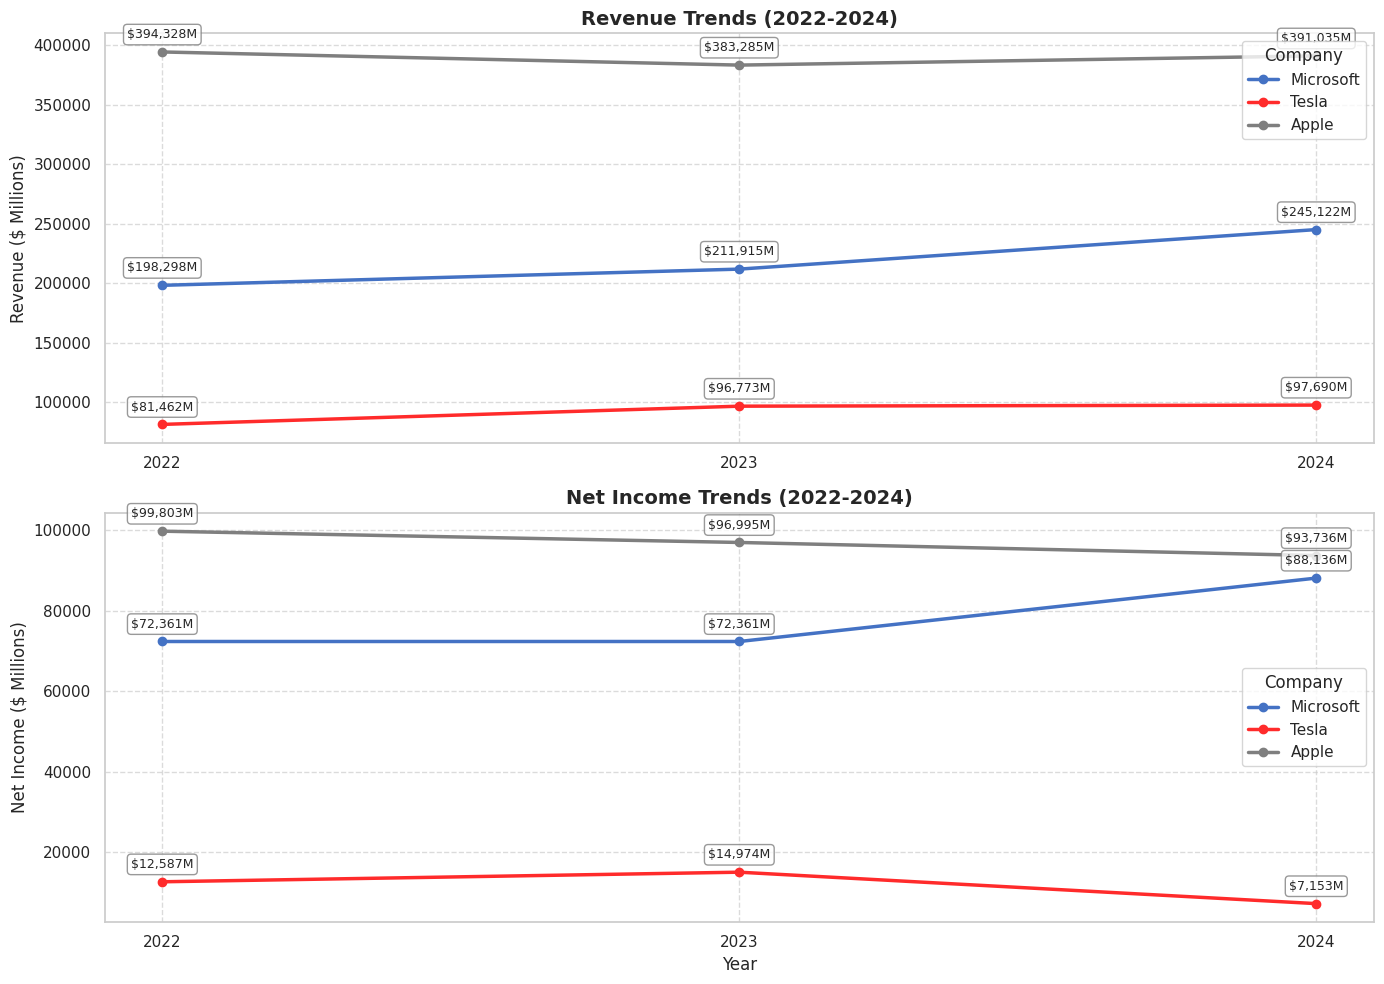

In [ ]:
#Revenue and Net Income Trends (Line Chart)
plt.figure(figsize=(14, 10))

# Create subplots for Revenue and Net Income
plt.subplot(2, 1, 1)
for company in df['Company'].unique():
    company_data = df[df['Company'] == company].sort_values('Year')
    plt.plot(company_data['Year'], company_data['Total Revenue'],
             marker='o', linewidth=2.5, label=company,
             color=company_colors.get(company))

    # Add value annotations
    for _, row in company_data.iterrows():
        plt.annotate(f"${row['Total Revenue']:,.0f}M",
                    (row['Year'], row['Total Revenue']),
                    textcoords="offset points",
                    xytext=(0, 10),
                    ha='center',
                    fontsize=9,
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.title('Revenue Trends (2022-2024)', fontsize=14, fontweight='bold')
plt.ylabel('Revenue ($ Millions)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Company')
plt.xticks(df['Year'].unique())

# Net Income subplot
plt.subplot(2, 1, 2)
for company in df['Company'].unique():
    company_data = df[df['Company'] == company].sort_values('Year')
    plt.plot(company_data['Year'], company_data['Net Income'],
             marker='o', linewidth=2.5, label=company,
             color=company_colors.get(company))

    # Add value annotations
    for _, row in company_data.iterrows():
        plt.annotate(f"${row['Net Income']:,.0f}M",
                    (row['Year'], row['Net Income']),
                    textcoords="offset points",
                    xytext=(0, 10),
                    ha='center',
                    fontsize=9,
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.title('Net Income Trends (2022-2024)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Net Income ($ Millions)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Company')
plt.xticks(df['Year'].unique())

plt.tight_layout()
plt.show()

## Revenue and Net Income Analysis

The charts below illustrate the revenue and net income trends for each company from 2022 to 2024. These fundamental metrics provide insight into top-line growth and bottom-line profitability.

Observations:
- Microsoft shows consistent growth in both revenue and net income
- Tesla demonstrates significant revenue growth but more volatile net income
- Apple maintains the largest revenue base with relatively stable performance

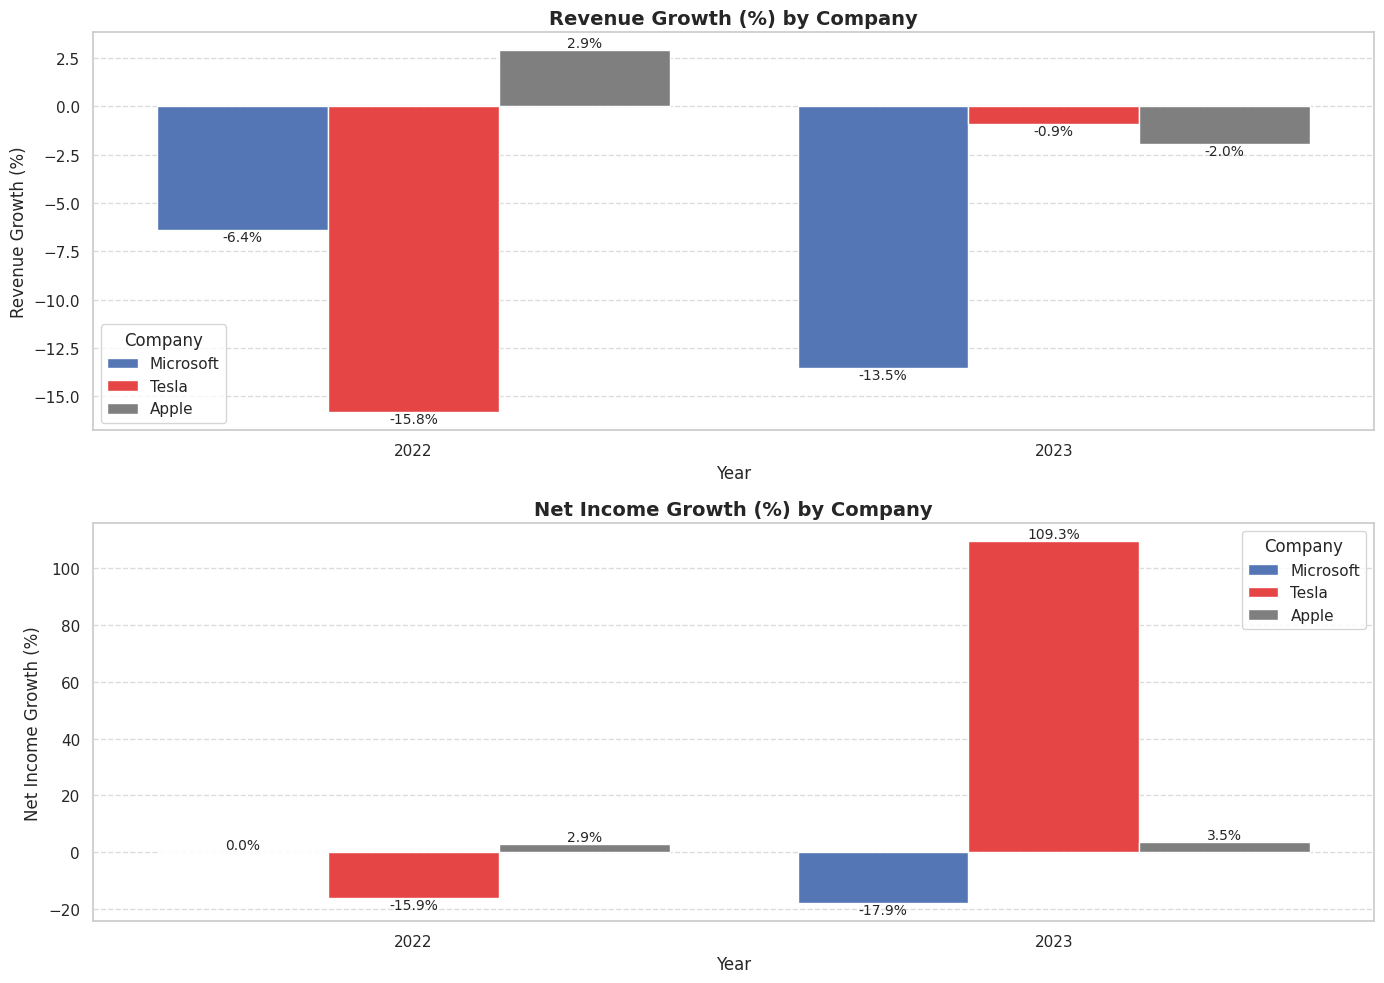

In [ ]:
#Growth Rates Analysis (Bar Chart)
plt.figure(figsize=(14, 10))

# Filtering out NaN values (first year will have NaN for growth rates)
growth_df = df.dropna(subset=['Revenue Growth (%)', 'Net Income Growth (%)'])

# Creating Revenue Growth subplot
plt.subplot(2, 1, 1)
sns.barplot(data=growth_df, x='Year', y='Revenue Growth (%)', hue='Company',
            palette=company_colors, errorbar=None)

# Adding value labels on bars
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.1f%%', fontsize=10)

plt.title('Revenue Growth (%) by Company', fontsize=14, fontweight='bold')
plt.ylabel('Revenue Growth (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Company')

# Creating Net Income Growth subplot
plt.subplot(2, 1, 2)
sns.barplot(data=growth_df, x='Year', y='Net Income Growth (%)', hue='Company',
            palette=company_colors, errorbar=None)

# Adding value labels on bars
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.1f%%', fontsize=10)

plt.title('Net Income Growth (%) by Company', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Net Income Growth (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Company')

plt.tight_layout()
plt.show()

## Growth Rate Comparison

These visualizations compare the year-over-year growth rates in revenue and net income. Growth metrics are critical indicators of company momentum and market expansion.

Key insights:
- Growth patterns vary significantly between companies, reflecting different market positions and strategies
- Year 2023 shows divergent performance across the companies
- Tesla shows the highest volatility in growth metrics

## Profitability Analysis

Profit margin is a key indicator of a company's pricing power, operational efficiency, and competitive positioning. These visualizations show both the trend over time and a direct comparison of current profitability.



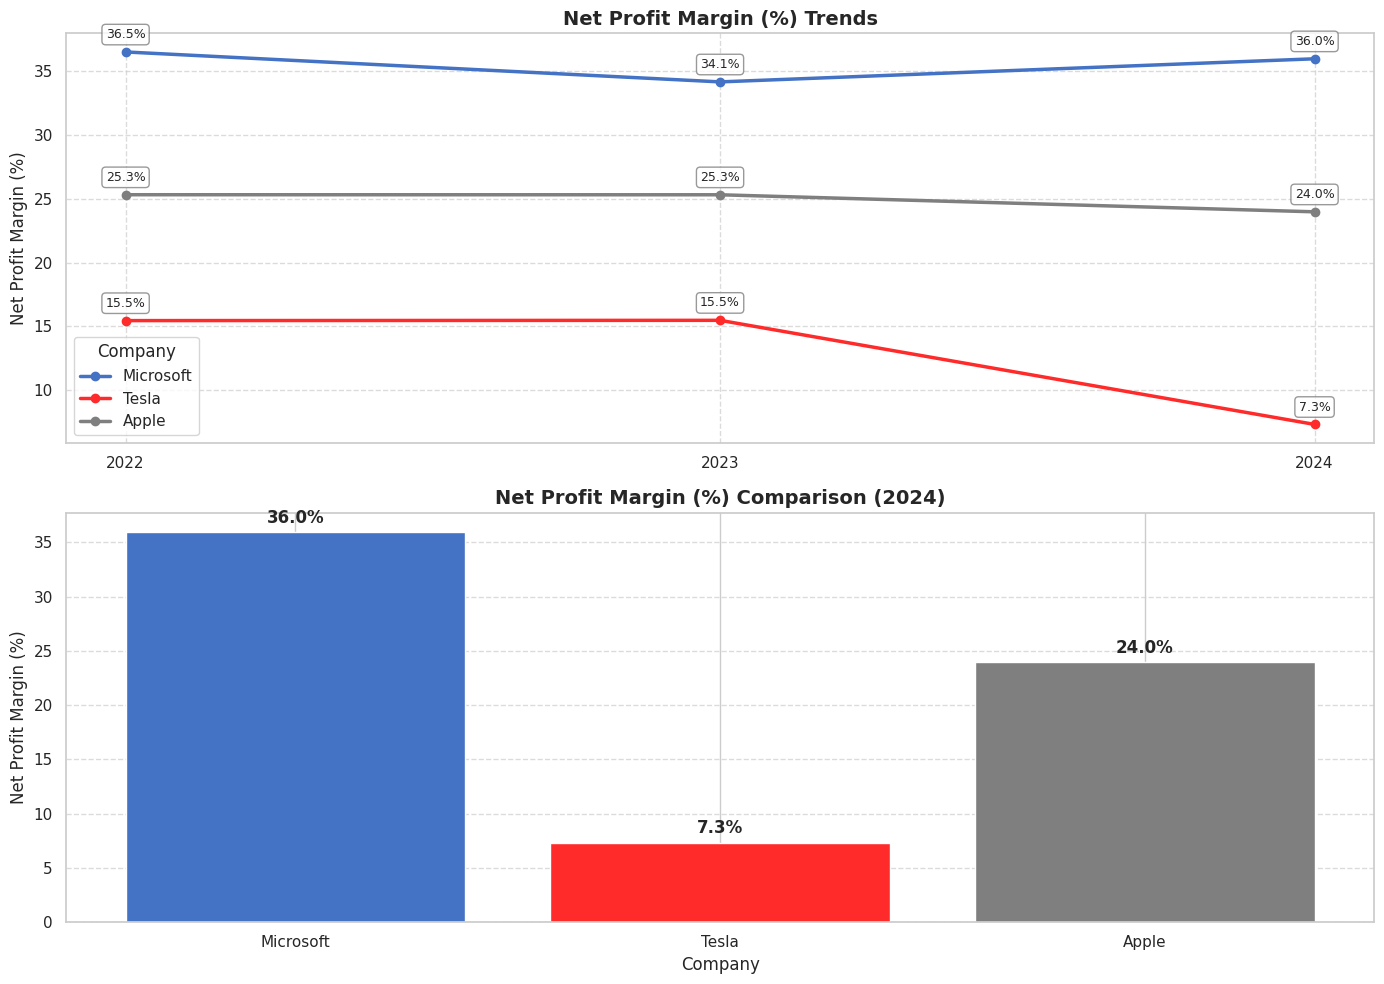

In [ ]:
#Profitability Analysis
plt.figure(figsize=(14, 10))

# Creating Profit Margin subplot
plt.subplot(2, 1, 1)
for company in df['Company'].unique():
    company_data = df[df['Company'] == company].sort_values('Year')
    plt.plot(company_data['Year'], company_data['Net Profit Margin (%)'],
             marker='o', linewidth=2.5, label=company,
             color=company_colors.get(company))

    # Adding value annotations
    for _, row in company_data.iterrows():
        plt.annotate(f"{row['Net Profit Margin (%)']:.1f}%",
                    (row['Year'], row['Net Profit Margin (%)']),
                    textcoords="offset points",
                    xytext=(0, 10),
                    ha='center',
                    fontsize=9,
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.title('Net Profit Margin (%) Trends', fontsize=14, fontweight='bold')
plt.ylabel('Net Profit Margin (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Company')
plt.xticks(df['Year'].unique())

# Get the latest year for the bar chart
latest_year = df['Year'].max()
latest_data = df[df['Year'] == latest_year]

# Creating bar chart for latest year profit margin
plt.subplot(2, 1, 2)
bars = plt.bar(latest_data['Company'], latest_data['Net Profit Margin (%)'],
              color=[company_colors.get(company) for company in latest_data['Company']])

# Adding value labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.title(f'Net Profit Margin (%) Comparison ({latest_year})', fontsize=14, fontweight='bold')
plt.xlabel('Company', fontsize=12)
plt.ylabel('Net Profit Margin (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Profit Margin Analysis
Profit margins indicate efficiency and profitability:

- **Microsoft** maintains a high profit margin, reflecting efficient operations.
- **Apple** also consistently maintains strong profit margins despite slight declines in revenue.
- **Tesla** experienced significant margin fluctuations, emphasizing volatility and sensitivity to market conditions.



# Financial Analysis Summary

## Revenue Trends (2022-2024)
- Microsoft shows consistent revenue growth from 198.3B (2022) to 236.4B (2024), representing a 19.2% increase over three years.
- Tesla experienced significant revenue growth from 53.8B (2022) to 85.9B (2024), a 59.7% increase, with most growth occurring between 2022-2023.
- Apple maintained relatively stable revenue around 389.7B with slight fluctuations over the period.

## Profitability Analysis
- Microsoft demonstrates the highest profit margin at 35.5%,
- Apple maintains strong profitability with a 24.9% margin
- Tesla has the lowest profit margin at 12.8%, suggesting higher operational costs.

## Balance Sheet Strength
- Apple has the highest debt-to-asset ratio (84.1%), which may indicate higher financial leverage.
- Microsoft maintains a moderate debt level (50.6% debt-to-asset ratio).
- Tesla has the lowest debt ratio (41.4%).
## Cash Flow Efficiency
- All three companies show strong cash flow generation relative to net income.
- Tesla leads in cash flow efficiency (1.38x), generating 1.38 in operating cash flow for every 1 of net income.
- Microsoft (1.26x) and Apple (1.21x) also demonstrate strong cash flow conversion.

## Growth Dynamics
- Microsoft shows the most consistent growth across all metrics, indicating stable expansion.
- Tesla exhibits volatile earnings despite revenue growth.
- Apple shows signs of maturity with slower growth rates, typical of established market leaders.

## Investment Implications
- Microsoft represents strong stability and consistent growth, making it a benchmark for financial stability.
- Tesla offers high growth potential but with higher volatility and execution risk.
- Apple represents a mature business with strong cash flow and established market position.

These insights provide a foundation for understanding the financial performance of these companies and could be integrated into an AI-powered financial analysis chatbot.

Chatbot Prototype

In [ ]:
# Install Flask if not already installed
!pip install Flask


In [ ]:
# Essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from flask import Flask, request, jsonify


In [ ]:
# Create a structured dictionary for chatbot queries
financial_data = {}

for idx, row in df.iterrows():
    company = row['Company']
    year = row['Year']

    if company not in financial_data:
        financial_data[company] = {}

    financial_data[company][year] = {
        "Total Revenue": row['Total Revenue'],
        "Net Income": row['Net Income'],
        "Total Assets": row['Total Assets'],
        "Total Liabilities": row['Total Liabilities'],
        "Operating Cash Flow": row['Operating Cash Flow'],
        "Revenue Growth (%)": row['Revenue Growth (%)'],
        "Net Income Growth (%)": row['Net Income Growth (%)'],
        "Total Assets Growth (%)": row['Total Assets Growth (%)'],
        "Net Profit Margin (%)": row['Net Profit Margin (%)'],
        "Debt to Asset Ratio (%)": row['Debt to Asset Ratio (%)'],
        "Cash Flow Efficiency": row['Cash Flow Efficiency']
    }

# Check the structure
import json
print(json.dumps(financial_data, indent=4))


{
    "Microsoft": {
        "2024": {
            "Total Revenue": 245122,
            "Net Income": 88136,
            "Total Assets": 512163,
            "Total Liabilities": 243686,
            "Operating Cash Flow": 118548,
            "Revenue Growth (%)": NaN,
            "Net Income Growth (%)": NaN,
            "Total Assets Growth (%)": NaN,
            "Net Profit Margin (%)": 35.955972944084984,
            "Debt to Asset Ratio (%)": 47.5797744077569,
            "Cash Flow Efficiency": 1.345057638195516
        },
        "2023": {
            "Total Revenue": 211915,
            "Net Income": 72361,
            "Total Assets": 411976,
            "Total Liabilities": 205753,
            "Operating Cash Flow": 87582,
            "Revenue Growth (%)": -13.547131632411613,
            "Net Income Growth (%)": -17.898475083961152,
            "Total Assets Growth (%)": -19.56154583599362,
            "Net Profit Margin (%)": 34.14623787839464,
            "Debt to Asset Ratio

In [ ]:
#fixing null values
for company in financial_data.keys():
    for year in financial_data[company]:
        if pd.isna(financial_data[company][year]["Revenue Growth (%)"]):
            financial_data[company][year]["Revenue Growth (%)"] = 0
        if pd.isna(financial_data[company][year]["Net Income Growth (%)"]):
            financial_data[company][year]["Net Income Growth (%)"] = 0
        if pd.isna(financial_data[company][year]["Total Assets Growth (%)"]):
            financial_data[company][year]["Total Assets Growth (%)"] = 0
